<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__3)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-3.csv',
 'data_multi_delta_0_n30-3.csv',
 'data_multi_delta_0_n60-3.csv',
 'data_multi_delta_0_n120-3.csv',
 'data_multi_delta_0_n250-3.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250-3.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.807540,51.749142,64.683063,-0.478197,197.761547,198.301293,-0.539746
1,0.0,1.0,61.889789,52.265583,39.663496,-0.382886,163.435981,163.789064,-0.353083
2,0.0,2.0,25.886902,87.225507,99.487619,-0.128254,222.471775,222.676262,-0.204487
3,0.0,3.0,48.284423,87.106729,95.991747,0.498538,241.881436,241.521280,0.360156
4,0.0,4.0,95.358500,48.997685,79.840132,-0.573460,233.622856,234.363593,-0.740736
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.776373,77.401444,71.425208,-0.435208,229.167817,229.716809,-0.548992
249996,999.0,246.0,72.523764,65.475803,26.237465,0.574039,174.811072,174.417422,0.393649
249997,999.0,247.0,26.953106,97.233749,20.793028,0.345329,155.325212,155.104268,0.220943
249998,999.0,248.0,57.956420,32.747484,94.442004,-0.743249,194.402658,195.006646,-0.603988


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.807540,51.749142,64.683063,-0.478197,197.761547,198.301293,-0.539746
1,0.0,1.0,61.889789,52.265583,39.663496,-0.382886,163.435981,163.789064,-0.353083
2,0.0,2.0,25.886902,87.225507,99.487619,-0.128254,222.471775,222.676262,-0.204487
3,0.0,3.0,48.284423,87.106729,95.991747,0.498538,241.881436,241.521280,0.360156
4,0.0,4.0,95.358500,48.997685,79.840132,-0.573460,233.622856,234.363593,-0.740736
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.776373,77.401444,71.425208,-0.435208,229.167817,229.716809,-0.548992
249996,999.0,246.0,72.523764,65.475803,26.237465,0.574039,174.811072,174.417422,0.393649
249997,999.0,247.0,26.953106,97.233749,20.793028,0.345329,155.325212,155.104268,0.220943
249998,999.0,248.0,57.956420,32.747484,94.442004,-0.743249,194.402658,195.006646,-0.603988


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.807540  51.749142  64.683063  ...  197.761547  198.301293 -0.539746
      1.0    61.889789  52.265583  39.663496  ...  163.435981  163.789064 -0.353083
      2.0    25.886902  87.225507  99.487619  ...  222.471775  222.676262 -0.204487
      3.0    48.284423  87.106729  95.991747  ...  241.881436  241.521280  0.360156
      4.0    95.358500  48.997685  79.840132  ...  233.622856  234.363593 -0.740736
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  70.776373  77.401444  71.425208  ...  229.167817  229.716809 -0.548992
      246.0  72.523764  65.475803  26.237465  ...  174.811072  174.417422  0.393649
      247.0  26.953106  97.233749  20.793028  ...  155.325212  155.104268  0.220943
      248.0  57.956420  32.747484  94.442004  ...  194.402658  195.006646 -0.603988
      249.0  87.092223  83.095532  57.350756  ...  236.725867  237.766161 -1.040294

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.807540  51.749142  64.683063  ...  197.761547  198.301293 -0.539746
      1.0    61.889789  52.265583  39.663496  ...  163.435981  163.789064 -0.353083
      2.0    25.886902  87.225507  99.487619  ...  222.471775  222.676262 -0.204487
      3.0    48.284423  87.106729  95.991747  ...  241.881436  241.521280  0.360156
      4.0    95.358500  48.997685  79.840132  ...  233.622856  234.363593 -0.740736
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  70.776373  77.401444  71.425208  ...  229.167817  229.716809 -0.548992
      246.0  72.523764  65.475803  26.237465  ...  174.811072  174.417422  0.393649
      247.0  26.953106  97.233749  20.793028  ...  155.325212  155.104268  0.220943
      248.0  57.956420  32.747484  94.442004  ...  194.402658  195.006646 -0.603988
      249.0  87.092223  83.095532  57.350756  ...  236.725867  237.766161 -1.040294

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.807540,51.749142,64.683063,-0.478197,197.761547,198.301293,-0.539746
1,0.0,1.0,61.889789,52.265583,39.663496,-0.382886,163.435981,163.789064,-0.353083
2,0.0,2.0,25.886902,87.225507,99.487619,-0.128254,222.471775,222.676262,-0.204487
3,0.0,3.0,48.284423,87.106729,95.991747,0.498538,241.881436,241.521280,0.360156
4,0.0,4.0,95.358500,48.997685,79.840132,-0.573460,233.622856,234.363593,-0.740736
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.776373,77.401444,71.425208,-0.435208,229.167817,229.716809,-0.548992
249996,999.0,246.0,72.523764,65.475803,26.237465,0.574039,174.811072,174.417422,0.393649
249997,999.0,247.0,26.953106,97.233749,20.793028,0.345329,155.325212,155.104268,0.220943
249998,999.0,248.0,57.956420,32.747484,94.442004,-0.743249,194.402658,195.006646,-0.603988


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.807540  51.749142  64.683063  ...  197.761547  198.301293 -0.539746
      1.0    61.889789  52.265583  39.663496  ...  163.435981  163.789064 -0.353083
      2.0    25.886902  87.225507  99.487619  ...  222.471775  222.676262 -0.204487
      3.0    48.284423  87.106729  95.991747  ...  241.881436  241.521280  0.360156
      4.0    95.358500  48.997685  79.840132  ...  233.622856  234.363593 -0.740736
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  70.776373  77.401444  71.425208  ...  229.167817  229.716809 -0.548992
      246.0  72.523764  65.475803  26.237465  ...  174.811072  174.417422  0.393649
      247.0  26.953106  97.233749  20.793028  ...  155.325212  155.104268  0.220943
      248.0  57.956420  32.747484  94.442004  ...  194.402658  195.006646 -0.603988
      249.0  87.092223  83.095532  57.350756  ...  236.725867  237.766161 -1.040294

[250000 rows x 7 columns]

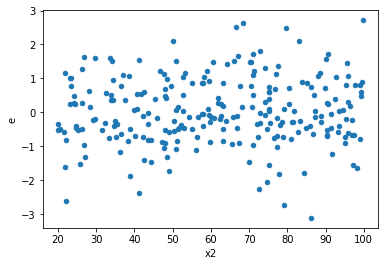

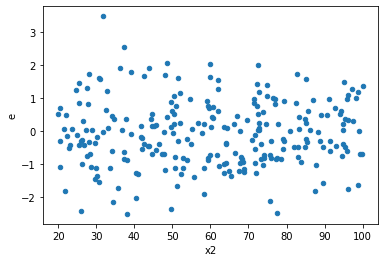

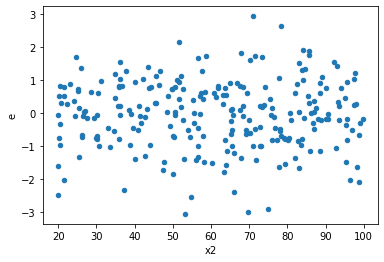

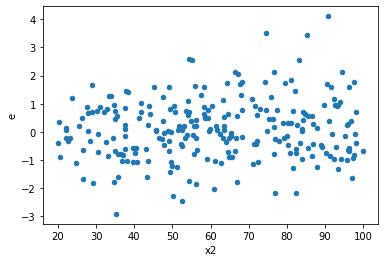

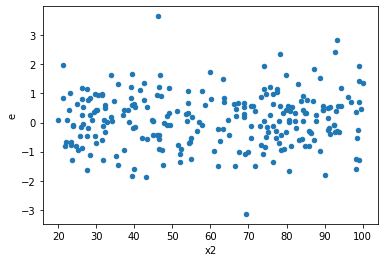

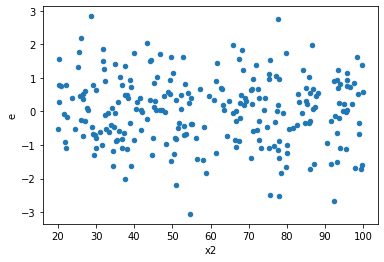

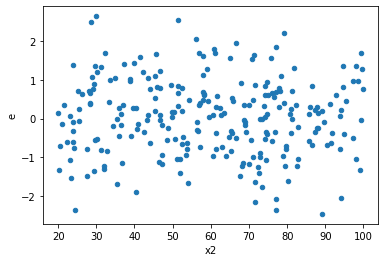

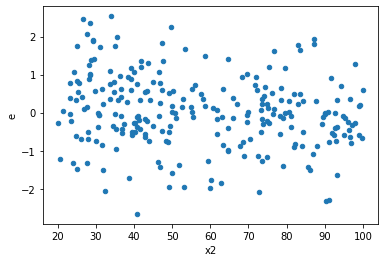

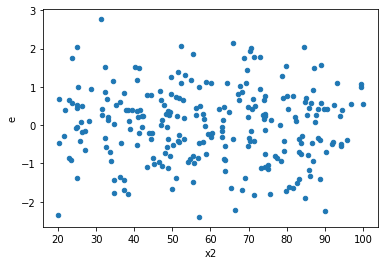

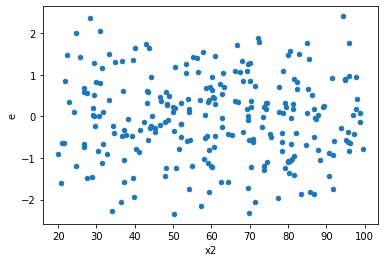

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,81.6586306045782,105.690214495276,0.8418415526245175,1.0895898401574844,1.2942932512188179,0.20575879761963223,0.8971206011901839,0.10287939880981611,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,93.24284439137934,116.94292580147528,0.9612664370245292,1.2055971732110855,1.254175873385166,0.2664713987199998,0.8667643006400001,0.1332356993599999,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,88.08907065552891,123.8005496725136,0.9081347490260713,1.2762943265207587,1.405401927290548,0.0953976593538739,0.952301170323063,0.04769882967693695,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,92.2397164753449,107.85137262335205,0.9509249121169578,1.1118698208592994,1.1692509121293757,0.44270801772221957,0.7786459911388902,0.22135400886110979,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,89.20832224268547,89.92867968424599,0.9196734251823244,0.9270997905592371,1.008075002684176,0.9684892895611137,0.5157553552194432,0.48424464478055684,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,78.77107099801268,91.72392777993028,0.8120728968867286,0.9456075028858791,1.1644367229975126,0.4548261825642357,0.7725869087178822,0.22741309128211784,Reject001=1 : Homoscedasticity
10.0,97.0,97.0,97.85354097865456,107.33980556150301,1.0087993915325213,1.1065959336237423,1.0969434982932067,0.6495464724146442,0.6752267637926779,0.3247732362073221,Reject001=1 : Homoscedasticity
11.0,97.0,97.0,91.13248744124986,100.34643760180016,0.9395101798066996,1.0344993567195893,1.10110500019535,0.6362270302424664,0.6818864848787668,0.3181135151212332,Reject001=1 : Homoscedasticity
12.0,97.0,97.0,93.4477741593098,125.66327427958369,0.963379115044431,1.2954976729853989,1.3447433650517229,0.14643552314341957,0.9267822384282902,0.07321776157170978,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,81.6586306045782,105.690214495276,0.8418415526245175,1.0895898401574844,1.2942932512188179,0.20575879761963223,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,120.68227009212578,80.06867562979836,1.2441471143518121,0.8254502642247254,0.6634667674769126,0.04462261930709448,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,93.24284439137934,116.94292580147528,0.9612664370245292,1.2055971732110855,1.254175873385166,0.2664713987199998,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,88.08907065552891,123.8005496725136,0.9081347490260713,1.2762943265207587,1.405401927290548,0.0953976593538739,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,82.38125535864017,79.13058683286755,0.8492912923571152,0.8157792456996654,0.9605411630155294,0.8432540556207632,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,92.2397164753449,107.85137262335205,0.9509249121169578,1.1118698208592994,1.1692509121293757,0.44270801772221957,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,89.20832224268547,89.92867968424599,0.9196734251823244,0.9270997905592371,1.008075002684176,0.9684892895611137,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,95.81096896534956,67.04174773097223,0.9877419480963872,0.6911520384636313,0.6997293572432001,0.08025892883746132,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,78.77107099801268,91.72392777993028,0.8120728968867286,0.9456075028858791,1.1644367229975126,0.4548261825642357,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      989
Reject001=0 : Heteroscedasticity     11
Name: Result_test, dtype: int64